In [49]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [105]:
df= pd.read_excel('Ask A Manager Salary Survey 2021 (Responses).xlsx')

In [106]:
df.head()

,Timestamp,Age,Industry,Job title,additional job attribute,Annual Salary,Additional Benifits,Currency,Other Currency,"If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Timestamp                                                                  28061 non-null  datetime64[ns]
 1   Age                                                                        28061 non-null  object        
 2   Industry                                                                   27987 non-null  object        
 3   Job title                                                                  28060 non-null  object        
 4   additional job attribute                                                   7262 non-null   object        
 5   Annual Salary                                                              28061 non-null  int64         
 6 

In [108]:
df.columns

Index(['Timestamp', 'Age', 'Industry', 'Job title', 'additional job attribute',
       'Annual Salary', 'Additional Benifits', 'Currency', 'Other Currency',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       'How many years of professional work experience do you have in your field?',
       'What is your highest level of education completed?',
       'What is your gender?', 'What is your race? (Choose all that apply.)'],
      dtype='object')

In [109]:
df.drop('Timestamp',axis=1,inplace=True)

In [110]:
df.isnull().sum()

Age                                                                              0
Industry                                                                        74
Job title                                                                        1
additional job attribute                                                     20799
Annual Salary                                                                    0
Additional Benifits                                                           7295
Currency                                                                         0
Other Currency                                                               27856
If your income needs additional context, please provide it here:             25019
What country do you work in?                                                     0
If you're in the U.S., what state do you work in?                             5022
What city do you work in?                                                       82
How 

In [111]:
df.duplicated().sum()

152

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.duplicated().sum()

0

In [114]:
df['Currency'].value_counts()

Currency
USD        23239
CAD         1666
GBP         1587
EUR          641
AUD/NZD      500
Other        159
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

In [115]:
df.loc[df['Currency'] == 'CAD', 'Annual Salary'] *= 0.745wsa
df.loc[df['Currency'] == 'GBP', 'Annual Salary'] *= 1.315
df.loc[df['Currency'] == 'EUR', 'Annual Salary'] *= 1.122
df.loc[df['Currency'] == 'AUD/NZD', 'Annual Salary'] *= 0.63
df.loc[df['Currency'] == 'CHF', 'Annual Salary'] *= 1.09
df.loc[df['Currency'] == 'SEK', 'Annual Salary'] *= 1.315
df.loc[df['Currency'] == 'JPY', 'Annual Salary'] *= 0.0093
df.loc[df['Currency'] == 'ZAR', 'Annual Salary'] *= 0.065
df.loc[df['Currency'] == 'HKD', 'Annual Salary'] *= 0.13


C:\Users\awans\AppData\Local\Temp\ipykernel_7544\250996170.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.38400000e+04 4.69350000e+04 8.94000000e+04 ... 1.22254500e+03
 4.47005215e+09 1.36335000e+04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Currency'] == 'CAD', 'Annual Salary'] *= 0.745


In [116]:
df['Currency'].isnull().sum()

0

In [117]:
df.drop('Other Currency',inplace=True,axis=1)

In [118]:
df.head()

,Age,Industry,Job title,additional job attribute,Annual Salary,Additional Benifits,Currency,"If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,71799.0,4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,USD,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,7000.0,USD,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [119]:
df.drop('additional job attribute',axis=1,inplace=True)
df.drop('If your income needs additional context, please provide it here:',axis=1,inplace=True)
df.drop('Additional Benifits',axis=1,inplace=True)


In [120]:
df.columns

Index(['Age', 'Industry', 'Job title', 'Annual Salary', 'Currency',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       'How many years of professional work experience do you have in your field?',
       'What is your highest level of education completed?',
       'What is your gender?', 'What is your race? (Choose all that apply.)'],
      dtype='object')

In [121]:
df.rename(columns={'What country do you work in?':'Working In',
                   "If you're in the U.S., what state do you work in?":'US State',
                   'What city do you work in?':'City',
                   'How many years of professional work experience do you have overall?':'Years of Experience',
                   'How many years of professional work experience do you have in your field?': 'Present Field Experience',
                    'What is your highest level of education completed?':'Education',
                    'What is your gender?':'Gender',
                     'What is your race? (Choose all that apply.)':'Race'
                   
                   
                   },inplace=True)

In [122]:
df.columns

Index(['Age', 'Industry', 'Job title', 'Annual Salary', 'Currency',
       'Working In', 'US State', 'City', 'Years of Experience',
       'Present Field Experience', 'Education', 'Gender', 'Race'],
      dtype='object')

In [123]:
df['Annual Salary'].astype(float)

0         55000.0
1         71799.0
2         34000.0
3         62000.0
4         60000.0
           ...   
28056     13633.5
28057    135000.0
28058    109000.0
28059      1200.0
28060      1700.0
Name: Annual Salary, Length: 27909, dtype: float64

In [124]:
df[df['Industry'].isna()]

,Age,Industry,Job title,Annual Salary,Currency,Working In,US State,City,Years of Experience,Present Field Experience,Education,Gender,Race
360,45-54,NaN,Proposal Manager,8.793800e+04,USD,US,North Carolina,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White
645,35-44,NaN,Legal editor,8.200000e+04,USD,USA,New York,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White
1604,25-34,NaN,Commissioning Editor,4.734000e+04,GBP,UK,NaN,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
2055,35-44,NaN,Research Manager,1.150000e+05,USD,US,District of Columbia,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White
2063,35-44,NaN,office manager,4.000000e+04,USD,USA,Nevada,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27730,18-24,NaN,chief executive official,3.250000e+00,ZAR,spain,NaN,castellon,8 - 10 years,11 - 20 years,NaN,NaN,NaN
27853,18-24,NaN,Archivist,5.000000e+04,USD,United States,Wisconsin,Madison,2 - 4 years,2 - 4 years,Master's degree,Man,White
27902,35-44,NaN,Senior IT Consultant,1.200000e+08,Other,Colombia,NaN,Bogota,11 - 20 years,8 - 10 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
28006,under 18,NaN,vv,7.600000e+01,USD,us,NaN,irving,1 year or less,1 year or less,NaN,NaN,NaN


In [125]:
df['Annual Salary'] = df['Annual Salary'].astype(int)

In [126]:
df = df[df['Currency'] != 'Other']

In [127]:
df['Currency'].value_counts()

Currency
USD        23239
CAD         1666
GBP         1587
EUR          641
AUD/NZD      500
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

In [128]:
df.dropna(subset=['Gender'], inplace=True)


In [129]:
df['Gender'].value_counts()

Gender
Woman                            21155
Man                               5395
Non-binary                         738
Other or prefer not to answer      291
Prefer not to answer                 1
Name: count, dtype: int64

In [130]:
df.isnull().sum()

Age                            0
Industry                      71
Job title                      1
Annual Salary                  0
Currency                       0
Working In                     0
US State                    4819
City                          82
Years of Experience            0
Present Field Experience       0
Education                    174
Gender                         0
Race                         114
dtype: int64

In [131]:
df['Race'].fillna('Prefer Not to Say',inplace=True)
df['Race'].fillna('',inplace=True)

C:\Users\awans\AppData\Local\Temp\ipykernel_7544\3638122262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Race'].fillna('Prefer Not to Say',inplace=True)


In [132]:
df.dropna(subset=['Industry'], inplace=True)
df.dropna(subset=['Job title'], inplace=True)
df.dropna(subset=['Education'], inplace=True)

In [133]:
df['Working In'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Great Britain ', 'US ', 'United State', 'U.S.A', 'Denmark',
       'U.S.A.', 'America', 'Netherlands', 'netherlands', 'England ',
       'united states of america', 'Ireland ', 'Switzerland',
       'Netherlands ', 'Bermuda', 'Us', 'The United States',
       'United State of America', 'Mexico ', 'United Stated',
       'South Africa ', 'Belgium', 'Northern Ireland', 'u.s.',
       'South Africa', 'UNITED STATES', 'united States', 'Sweden',
       'Hong Kong', 'Kuwait', 'Sri lanka', 'Contracts',
    

In [134]:
US_states=df['Working In'][df['Working In'].str.startswith('U')].unique()
US_states

array(['United States', 'United Kingdom', 'US', 'USA', 'United Kingdom ',
       'UK', 'U.S.', 'United States ', 'Usa', 'United States of America',
       'United states', 'USA ', 'United states ', 'UK ', 'Uk',
       'United States of America ', 'U.S. ', 'U.S>', 'US ',
       'United State', 'U.S.A', 'U.S.A.', 'Us', 'United State of America',
       'United Stated', 'UNITED STATES', 'USA-- Virgin Islands',
       'United Statws', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ',
       'Uniited States', 'United Kingdom (England)',
       'United Sates of America',
       'United States (I work from home and my clients are all over the US/Canada/PR',
       'Unted States', 'United Statesp', 'United Stattes',
       'United Statea', 'United Kingdom.', 'Unites States',
       'United Statees', 'United kingdom', 'United kingdom ',
       'Uniyed states', 'Uniyes States', 'United States of Americas',
       'U.A.', 'U. S.', 'US of A'

In [9]:
usa_entries = [
    'USA',
    'usa',
    'us',
    'united states',
    'America',
    'united states of america',
    'The United States',
    'U.S>',
    'U.SA',
    'Unted States',
    'United Stated',
    'u.s.',
    'united States',
    'United Statees',
    'Uniyed states',
    'Uniyes States',
    'U. S.',
    'U.S.',
    'The US',
    'Unite States',
    'isa',
    'Uniteed States',
    'USAB',
    'Unitied States',
    'United Stares',
    'U.S.',
    'United Status',
    'United Statues',
    'Untied States',
    'United States Of America',
    'United STates',
    'USaa','ua',
    'uSA','Hartford',
    'america',
    'United  States',
    'Uniter Statez',
    'U. S',
    'United states of America',
    'Unitef Stated',
    'United Stares ','Usa tomorrow',
    'I am located in Canada but I work for a company in the US',
    'USA, but for foreign gov\'t',
    'For the United States government, but posted overseas',
    'I work for a UAE-based organization, though I am personally in the US',
    'USA, united state'
      , 'u.s.a', 
       'united state of america',  'usa-- virgin islands', 'united statws', 
       'u.s',  'united sates',
       
       'united states of american',  'united statesp', 'united stattes',
       'united statea',  'united states of americas', 'us of a',
       'usa tomorrow', 'united stateds',
       'us govt employee overseas, country withheld',  'usat',
       'united states- puerto rico','united states is america',
       'united statss',
       'united states is america'
    'united sates of america',
    'u.s.a.',
    'uniited states',
    'united sates of america','unitedstates', '🇺🇸',
    'u.s.a.', 'uss','USA' '🇺🇸','usd',
 'unites states',   'united sttes','US',''
 'us','unites states',
 'united statew'
]




In [10]:
df['Working In'] = df['Working In'].str.strip().str.lower()
usa_entries_normalized = [entry.lower() for entry in usa_entries]
df['Working In']=np.where(df['Working In'].isin(usa_entries_normalized),'USA',df['Working In'])

In [137]:
df['Working In'].unique()

array(['USA', 'united kingdom', 'canada', 'uk', 'scotland',
       'the netherlands', 'australia', 'spain', 'england', 'finland',
       'france', 'germany', 'ireland', 'great britain', 'united state',
       'u.s.a', 'denmark', 'netherlands', 'switzerland', 'bermuda',
       'united state of america', 'mexico', 'south africa', 'belgium',
       'northern ireland', 'sweden', 'hong kong', 'kuwait', 'sri lanka',
       'contracts', 'usa-- virgin islands', 'united statws', 'england/uk',
       'u.s',
       "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located",
       'england, uk.', 'greece', 'britain', 'united sates', 'austria',
       'canada, ottawa, ontario', 'global', 'united states of american',
       'united kingdom (england)',
       'worldwide (based in us but short term trips aroudn the world)',
       'canadw', 'luxembou

In [138]:
df.to_csv('Half_cleaned.csv')

In [2]:
df=pd.read_csv("Half_cleaned.csv")

In [11]:
df['Working In'].unique()

array(['USA', 'united kingdom', 'canada', 'uk', 'scotland',
       'the netherlands', 'australia', 'spain', 'england', 'finland',
       'france', 'germany', 'ireland', 'great britain', 'united state',
       'denmark', 'netherlands', 'switzerland', 'bermuda', 'mexico',
       'south africa', 'belgium', 'northern ireland', 'sweden',
       'hong kong', 'kuwait', 'sri lanka', 'contracts', 'england/uk',
       'england, uk.', 'greece', 'britain', 'austria',
       'canada, ottawa, ontario', 'global', 'united kingdom (england)',
       'canadw', 'luxembourg', 'colombia', 'united kingdom.',
       'new zealand', 'cayman islands', 'u.a.', 'latvia', 'puerto rico',
       'rwanda', 'united arab emirates', 'u.k.', 'romania',
       'united kindom', 'currently finance', 'serbia', 'russia',
       'england, uk', 'canda', 'canada and usa', 'catalonia',
       'italy (south)', 'jersey, channel islands', 'virginia',
       'afghanistan', 'new zealand aotearoa', 'japan, us gov position',
       'csn

In [12]:
replace=[ "we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located",
        'i work for a uae-based organization, though i am personally in the us.',
         'austria, but i work remotely for a dutch/british company','united y',
         'from romania, but for an us based company','na','n/a (remote from wherever i want)','policy',
         'from new zealand but on projects across apac','can','y','africa,'
       'i was brought in on this salary to help with the ehr and very quickly was promoted to current position but compensation was not altered.',
      "i earn commission on sales. if i meet quota, i'm guaranteed another 16k min. last year i earned an additional 27k. it's not uncommon for people in my space to earn 100k+ after commission.",
     '$2,175.84/year is deducted for benefits','worldwide (based in us but short term trips aroudn the world)',"we don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so i got a raise because a 3rd party assessment showed i was paid too little for the area we were located"
     'ss', 'dbfemf','company in germany. i work from pakistan.', 'uk, but for globally fully remote company', 'ss','uxz', 'united states (i work from home and my clients are all over the us/canada/pr',
      'i was brought in on this salary to help with the ehr and very quickly was promoted to current position but compensation was not altered.',
      
     ]
df=df[~df['Working In'].isin(replace)]
df['Working In'].unique()

array(['USA', 'united kingdom', 'canada', 'uk', 'scotland',
       'the netherlands', 'australia', 'spain', 'england', 'finland',
       'france', 'germany', 'ireland', 'great britain', 'united state',
       'denmark', 'netherlands', 'switzerland', 'bermuda', 'mexico',
       'south africa', 'belgium', 'northern ireland', 'sweden',
       'hong kong', 'kuwait', 'sri lanka', 'contracts', 'england/uk',
       'england, uk.', 'greece', 'britain', 'austria',
       'canada, ottawa, ontario', 'global', 'united kingdom (england)',
       'canadw', 'luxembourg', 'colombia', 'united kingdom.',
       'new zealand', 'cayman islands', 'u.a.', 'latvia', 'puerto rico',
       'rwanda', 'united arab emirates', 'u.k.', 'romania',
       'united kindom', 'currently finance', 'serbia', 'russia',
       'england, uk', 'canda', 'canada and usa', 'catalonia',
       'italy (south)', 'jersey, channel islands', 'virginia',
       'afghanistan', 'new zealand aotearoa', 'japan, us gov position',
       'csn

In [13]:
united_kingdom=[
     'united kingdom', 'canada', 'uk', 'scotland', 'england',  'great britain',  'northern ireland', 'england/uk', 'england, uk.',
       'britain', 
       'united kingdom (england)', 
       'united kingdom.', 'u.k.',
        'united kindom',  'england, uk', 
       'uk (northern ireland)', 'uk for u.s. company','london',
       'united kingdomk',  'wales (united kingdom)',
       'england, gb',
       'u.k. (northern england)', 'u.k',  'england, united kingdom',
       'englang',
       'wales', 'uk (england)',
       'uk, remote', 'scotland, uk', 'unites kingdom', 'wales, uk', 'wales (uk)',
       'northern ireland, united kingdom'
    
]
df['Working In'] = df['Working In'].str.strip().str.lower()
uk_entries_normalized = [entry.lower() for entry in united_kingdom]
df['Working In']=np.where(df['Working In'].isin(uk_entries_normalized),'United Kingdom',df['Working In'])
df['Working In'].unique()

array(['usa', 'United Kingdom', 'the netherlands', 'australia', 'spain',
       'finland', 'france', 'germany', 'ireland', 'united state',
       'denmark', 'netherlands', 'switzerland', 'bermuda', 'mexico',
       'south africa', 'belgium', 'sweden', 'hong kong', 'kuwait',
       'sri lanka', 'contracts', 'greece', 'austria',
       'canada, ottawa, ontario', 'global', 'canadw', 'luxembourg',
       'colombia', 'new zealand', 'cayman islands', 'u.a.', 'latvia',
       'puerto rico', 'rwanda', 'united arab emirates', 'romania',
       'currently finance', 'serbia', 'russia', 'canda', 'canada and usa',
       'catalonia', 'italy (south)', 'jersey, channel islands',
       'virginia', 'afghanistan', 'new zealand aotearoa',
       'japan, us gov position', 'csnada', 'i.s.', 'japan', 'nz', 'canad',
       'china', 'cambodia', 'vietnam', 'remote', 'india', 'bangladesh',
       'israel', 'lithuania', 'eritrea', 'is', 'italy', 'norway', 'cuba',
       'slovenia', 'australi', "cote d'ivoire", 

In [14]:
duplicates = {
    "United States": ["usa", "united state", "us", "usat", "virginia", "california", "san francisco", "remote (usa)", "puerto rico"],
    "United Kingdom": ["united kingdom", "uk", "jersey, channel islands", "isle of man", "loutreland"],
    "Netherlands": ["netherlands", "the netherlands", "nederland", "nl"],
    "Canada": ["canada", "canadw", "canda", "canad", "csnada", "canada, ottawa, ontario", "canada and usa", "canadá"],
    "New Zealand": ["new zealand", "aotearoa new zealand", "new zealand aotearoa", "nz"],
    "United Arab Emirates": ["united arab emirates", "u.a.", "uae", "ua"],
    "Hong Kong": ["hong kong", "hong konh"],
    "Australia": ["australia", "australi", "australian"],
    "Luxembourg": ["luxembourg", "luxemburg"],
    "Israel": ["israel", "is", "i.s."],
    "Japan": ["japan", "japan, us gov position"],
    "Italy": ["italy", "italy (south)"],
    "France": ["france", "currently finance"],
    "International": ["contracts", "international", "global", "remote"],
    "Philippines": ["philippines", "remote (philippines)"],
    "Spain": ["spain"],
    "Finland": ["finland"],
    "Germany": ["germany"],
    "Ireland": ["ireland"],
    "Denmark": ["denmark", "danmark"],
    "Switzerland": ["switzerland"],
    "Bermuda": ["bermuda"],
    "Mexico": ["mexico"],
    "South Africa": ["south africa"],
    "Belgium": ["belgium"],
    "Sweden": ["sweden"],
    "Kuwait": ["kuwait"],
    "Sri Lanka": ["sri lanka"],
    "Greece": ["greece"],
    "Austria": ["austria"],
    "Colombia": ["colombia"],
    "Cayman Islands": ["cayman islands"],
    "Latvia": ["latvia"],
    "Rwanda": ["rwanda"],
    "Romania": ["romania"],
    "Serbia": ["serbia"],
    "Russia": ["russia"],
    "Catalonia": ["catalonia"],
    "Afghanistan": ["afghanistan"],
    "China": ["china"],
    "Cambodia": ["cambodia"],
    "Vietnam": ["vietnam"],
    "India": ["india"],
    "Bangladesh": ["bangladesh"],
    "Lithuania": ["lithuania"],
    "Eritrea": ["eritrea"],
    "Cuba": ["cuba"],
    "Slovenia": ["slovenia"],
    "Côte d'Ivoire": ["cote d'ivoire"],
    "Somalia": ["somalia"],
    "Malaysia": ["malaysia"],
    "Slovakia": ["slovakia"],
    "Portugal": ["portugal"],
    "Sierra Leone": ["sierra leone"],
    "Singapore": ["singapore"],
    "Bahamas": ["the bahamas"],
    "Costa Rica": ["costa rica"],
    "Argentina": ["argentina"],
    "Chile": ["chile"],
    "Qatar": ["qatar"],
    "Hungary": ["hungary"],
    "Nigeria": ["nigeria"],
    "Panama": ["panamá"],
    "Brazil": ["brazil"],
    "Congo": ["congo"],
    "Uruguay": ["uruguay"],
    "Pakistan": ["pakistan"],
    "Uganda": ["uganda"],
    "Poland": ["poland"],
    "Malta": ["malta"],
    "Bulgaria": ["bulgaria"],
    "Estonia": ["estonia"],
    "Morocco": ["morocco"],
    "Ecuador": ["ecuador"],
    "Zimbabwe": ["zimbabwe"],
    "Ghana": ["ghana"],
    "Croatia": ["croatia"],
    "South Korea": ["south korea"],
    "Ukraine": ["ukraine"],
    "Thailand": ["thailand"],
    "Liechtenstein": ["liechtenstein"],
    "Bosnia and Herzegovina": ["bosnia and herzegovina"],
    "Saudi Arabia": ["saudi arabia"],
    "Myanmar": ["myanmar", "burma"]
}

# Reversing the dictionary
duplicates = {v: k for k, values in duplicates.items() for v in values}

df['Working In'] = df['Working In'].replace(duplicates)
df['Working In'].unique()


array(['United States', 'United Kingdom', 'Netherlands', 'Australia',
       'Spain', 'Finland', 'France', 'Germany', 'Ireland', 'Denmark',
       'Switzerland', 'Bermuda', 'Mexico', 'South Africa', 'Belgium',
       'Sweden', 'Hong Kong', 'Kuwait', 'Sri Lanka', 'International',
       'Greece', 'Austria', 'Canada', 'Luxembourg', 'Colombia',
       'New Zealand', 'Cayman Islands', 'United Arab Emirates', 'Latvia',
       'Rwanda', 'Romania', 'Serbia', 'Russia', 'Catalonia', 'Italy',
       'Afghanistan', 'Japan', 'Israel', 'China', 'Cambodia', 'Vietnam',
       'India', 'Bangladesh', 'Lithuania', 'Eritrea', 'norway', 'Cuba',
       'Slovenia', "Côte d'Ivoire", 'Somalia', 'Malaysia', 'Slovakia',
       'Portugal', 'Sierra Leone', 'Singapore', 'Bahamas', 'Costa Rica',
       'Argentina', 'Chile', 'Qatar', 'Hungary', 'Philippines', 'Nigeria',
       'Panama', 'Brazil', 'Congo', 'Uruguay', 'Pakistan', 'Uganda',
       'Poland', 'Malta', 'Bulgaria', 'Estonia', 'Morocco', 'africa',
       'E

In [15]:
df['Working In']=df['Working In'].str.capitalize()
df['Working In'].unique()

array(['United states', 'United kingdom', 'Netherlands', 'Australia',
       'Spain', 'Finland', 'France', 'Germany', 'Ireland', 'Denmark',
       'Switzerland', 'Bermuda', 'Mexico', 'South africa', 'Belgium',
       'Sweden', 'Hong kong', 'Kuwait', 'Sri lanka', 'International',
       'Greece', 'Austria', 'Canada', 'Luxembourg', 'Colombia',
       'New zealand', 'Cayman islands', 'United arab emirates', 'Latvia',
       'Rwanda', 'Romania', 'Serbia', 'Russia', 'Catalonia', 'Italy',
       'Afghanistan', 'Japan', 'Israel', 'China', 'Cambodia', 'Vietnam',
       'India', 'Bangladesh', 'Lithuania', 'Eritrea', 'Norway', 'Cuba',
       'Slovenia', "Côte d'ivoire", 'Somalia', 'Malaysia', 'Slovakia',
       'Portugal', 'Sierra leone', 'Singapore', 'Bahamas', 'Costa rica',
       'Argentina', 'Chile', 'Qatar', 'Hungary', 'Philippines', 'Nigeria',
       'Panama', 'Brazil', 'Congo', 'Uruguay', 'Pakistan', 'Uganda',
       'Poland', 'Malta', 'Bulgaria', 'Estonia', 'Morocco', 'Africa',
       'E

In [17]:
df.head()

,Unnamed: 0,Age,Industry,Job title,Annual Salary,Currency,Working In,US State,City,Years of Experience,Present Field Experience,Education,Gender,Race
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,United states,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,71799,GBP,United kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,United states,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,25-34,Nonprofits,Program Manager,62000,USD,United states,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,United states,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [70]:
df['Currency'].value_counts()

Currency
USD        22843
CAD         1630
GBP         1551
EUR          609
AUD/NZD      489
CHF           37
SEK           35
JPY           22
ZAR           14
HKD            4
Name: count, dtype: int64

In [73]:
df.rename(columns={'Annual Salary':'Annual Salary(USDA)'
                   
                   
                   },inplace=True)

In [ ]:
df.drop('Currency',axis=1,inplace=True)

In [28]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('US State',axis=1,inplace=True)

In [74]:
df.columns

Index(['Age', 'Industry', 'Job title', 'Annual Salary(USDA)', 'Working In',
       'City', 'Years of Experience', 'Present Field Experience', 'Education',
       'Gender', 'Race'],
      dtype='object')

In [30]:
original=df.copy()

In [78]:
df.head()

,Age,Industry,Job title,Annual Salary(USDA),Working In,City,Years of Experience,Present Field Experience,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,United states,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,71799,United kingdom,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,United states,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,62000,United states,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,United states,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [32]:
df.isnull().sum()

Age                          0
Industry                     0
Job title                    0
Annual Salary                0
Currency                     0
Working In                   0
City                        81
Years of Experience          0
Present Field Experience     0
Education                    0
Gender                       0
Race                         0
dtype: int64

In [33]:
df.shape

(27315, 12)

In [44]:
df.dropna(subset=['City'],inplace=True)

In [79]:
df.isnull().sum()

Age                         0
Industry                    0
Job title                   0
Annual Salary(USDA)         0
Working In                  0
City                        0
Years of Experience         0
Present Field Experience    0
Education                   0
Gender                      0
Race                        0
dtype: int64

In [75]:
df.to_csv('cleaned data.csv')

### **EXPLORATORY DATA ANALYSIS**

In [59]:
df['Gender'].value_counts()

Gender
Woman                            20889
Man                               5326
Non-binary                         734
Other or prefer not to answer      284
Prefer not to answer                 1
Name: count, dtype: int64

In [66]:
df['Gender']=df['Gender'].replace('Prefer not to answer','Other or prefer not to answer')

[]

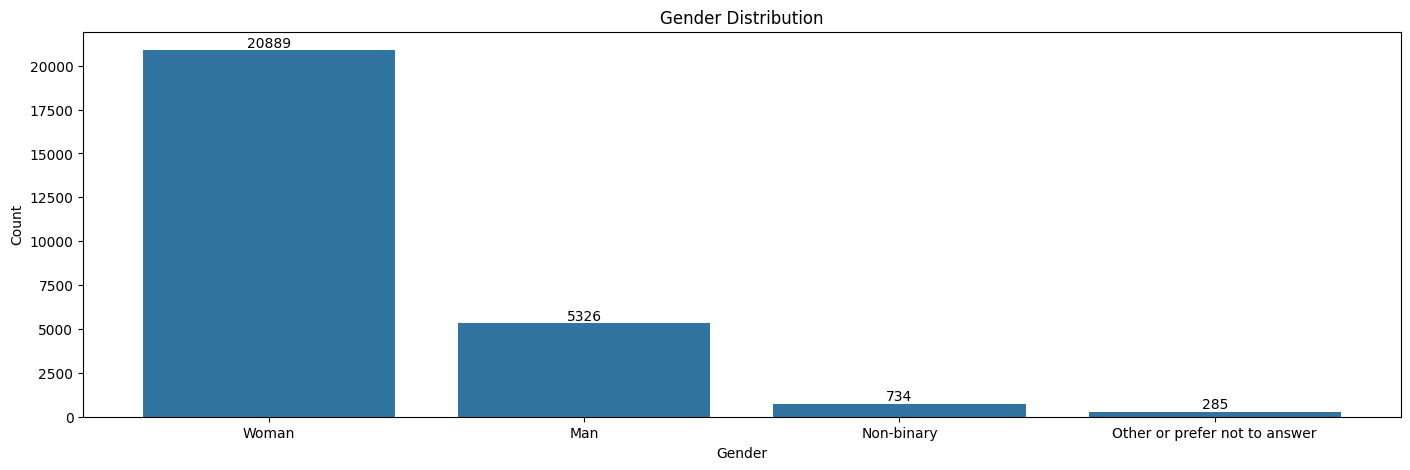

In [69]:
plt.figure(figsize=(17,5))
sns.barplot(df['Gender'].value_counts())
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for i,j in enumerate(df['Gender'].value_counts()):
    plt.annotate(str(j),(i,j),ha='center',va='bottom')
plt.plot()

In [83]:
df['Working In'].value_counts()

Working In
United states     22659
United kingdom     3195
Australia           378
Germany             189
New zealand         124
                  ...  
Congo                 1
Uruguay               1
Eritrea               1
Uganda                1
Russia                1
Name: count, Length: 90, dtype: int64